<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [2]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ╸━━━━━━━━━━━━━━━╸━━━━━━━━   0.0 B /  ??.?MB @ 

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [63]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [5]:
# Create a ticker object for TSLA (Tesla)
ticker = yf.Ticker("TSLA")

# Retrieve historical stock data
historical_data = ticker.history(period="1d", start="2022-01-01", end="2022-12-31")

# Display the historical data
print(historical_data)

                  Open        High         Low       Close     Volume  \
Date                                                                    
2022-01-03  382.583344  400.356659  378.679993  399.926666  103931400   
2022-01-04  396.516663  402.666656  374.350006  383.196655  100248300   
2022-01-05  382.216675  390.113342  360.336670  362.706665   80119800   
2022-01-06  359.000000  362.666656  340.166656  354.899994   90336600   
2022-01-07  360.123322  360.309998  336.666656  342.320007   84164700   
...                ...         ...         ...         ...        ...   
2022-12-23  126.370003  128.619995  121.019997  123.150002  166989700   
2022-12-27  117.500000  119.669998  108.760002  109.099998  208643400   
2022-12-28  110.349998  116.269997  108.239998  112.709999  221070500   
2022-12-29  120.389999  123.570000  117.500000  121.820000  221923300   
2022-12-30  119.949997  124.480003  119.750000  123.180000  157777300   

            Dividends  Stock Splits  
Date        

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [6]:
# Retrieve historical stock data for the maximum period
tesla_data = ticker.history(period="max")

# Display the first few rows of the DataFrame
tesla_data.head()

                Open      High       Low     Close     Volume  Dividends  \
Date                                                                       
2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

            Stock Splits  
Date                      
2010-06-29           0.0  
2010-06-30           0.0  
2010-07-01           0.0  
2010-07-02           0.0  
2010-07-06           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [8]:
tesla_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
tesla_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [9]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the response text as html_data
    html_data = response.text
    print("Webpage content downloaded successfully.")
else:
    print("Failed to download the webpage. Status code:", response.status_code)


Webpage content downloaded successfully.


Parse the html data using `beautiful_soup`.


In [10]:
from bs4 import BeautifulSoup

# Parse the HTML data using Beautiful Soup
soup = BeautifulSoup(html_data, 'lxml')

# Now you can navigate and manipulate the HTML content using Beautiful Soup
# For example, let's print the title of the webpage
print("Webpage Title:", soup.title.text)


Webpage Title: Tesla Revenue 2010-2022 | TSLA | MacroTrends


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [20]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL and get the HTML content
response = requests.get(url)
html_data = response.text

# Parse the HTML data using Beautiful Soup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table with Tesla Revenue
table = soup.find('table')

# Extract data from the table and store it in a DataFrame
tesla_revenue = pd.read_html(str(table))[0]

# Rename the columns to 'Date' and 'Revenue'
tesla_revenue.columns = ['Date', 'Revenue']

# Display the first few rows of the DataFrame
tesla_revenue.head()


,Date,Revenue
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [21]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


Execute the following lines to remove an null or empty strings in the Revenue column.


In [22]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [23]:
tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [24]:
import yfinance as yf

# Create a ticker object for GME (GameStop)
ticker_gme = yf.Ticker("GME")

# Retrieve historical stock data
historical_data_gme = ticker_gme.history(period="1d", start="2022-01-01", end="2022-12-31")

# Display the historical data for GME
print(historical_data_gme)


                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2022-01-03  37.307499  39.845001  37.302502  38.209999   5654800          0   
2022-01-04  38.042500  38.247501  35.762501  37.227501   7339600          0   
2022-01-05  37.097500  37.212502  32.287498  32.342499  13585600          0   
2022-01-06  33.209999  34.424999  30.285000  32.757500  24206000          0   
2022-01-07  39.942501  40.077499  33.125000  35.154999  48549200          0   
...               ...        ...        ...        ...       ...        ...   
2022-12-23  20.000000  20.629999  19.650000  20.080000   3174800          0   
2022-12-27  19.910000  19.990000  18.000000  18.200001   4233000          0   
2022-12-28  18.290001  18.700001  16.980000  17.920000   5672000          0   
2022-12-29  18.120001  18.570000  17.750000  18.330000   3442800          0   
2022-12-30  17.950001  18.580000  17.900000  18.4599

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [25]:
import yfinance as yf

# Create a ticker object for GME (GameStop)
ticker_gme = yf.Ticker("GME")

# Retrieve historical stock data for the maximum period
gme_data = ticker_gme.history(period="max")

# Display the first few rows of the DataFrame
print(gme_data.head())


                Open      High       Low     Close    Volume  Dividends  \
Date                                                                      
2002-02-13  1.620128  1.693350  1.603296  1.691667  76216000        0.0   
2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600        0.0   
2002-02-15  1.683250  1.687458  1.658002  1.674834   8389600        0.0   
2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
2002-02-20  1.615921  1.662210  1.603296  1.662210   6892800        0.0   

            Stock Splits  
Date                      
2002-02-13           0.0  
2002-02-14           0.0  
2002-02-15           0.0  
2002-02-19           0.0  
2002-02-20           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [27]:
import yfinance as yf

# Create a ticker object for GME (GameStop)
ticker_gme = yf.Ticker("GME")

# Retrieve historical stock data for the maximum period
gme_data = ticker_gme.history(period="max")

# Reset the index of the DataFrame in-place
gme_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [48]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the response text as html_data
    html_data = response.text
    print("Webpage content downloaded successfully.")
else:
    print("Failed to download the webpage. Status code:", response.status_code)


Webpage content downloaded successfully.


Parse the html data using `beautiful_soup`.


In [49]:
from bs4 import BeautifulSoup

# Parse the HTML data using Beautiful Soup
soup = BeautifulSoup(html_data, 'html.parser')

# Now you can navigate and manipulate the HTML content using Beautiful Soup
# For example, let's print the title of the webpage
print("Webpage Title:", soup.title.text)


Webpage Title: GameStop Revenue 2006-2020 | GME | MacroTrends


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [51]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL and get the HTML content
response = requests.get(url)
html_data = response.text

# Parse the HTML data using Beautiful Soup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table with GameStop Revenue
table = soup.find('table')

# Extract data from the table and store it in a DataFrame
gme_revenue = pd.read_html(str(table))[0]

# Rename the columns to 'Date' and 'Revenue'
gme_revenue.columns = ['Date', 'Revenue']

# Remove commas and dollar signs from the 'Revenue' column
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)

# Display the first few rows of the DataFrame
gme_revenue.head()


,Date,Revenue
0,2020,6466.0
1,2019,8285.0
2,2018,8547.0
3,2017,7965.0
4,2016,9364.0


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [52]:
gme_revenue.tail()

,Date,Revenue
11,2009,8806.0
12,2008,7094.0
13,2007,5319.0
14,2006,3092.0
15,2005,1843.0


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


In [66]:
# Assuming tesla_data and tesla_revenue are DataFrames for Tesla stock data and revenue

# Call the make_graph function
make_graph(tesla_data, tesla_revenue, 'Tesla')


TypeError: make_graph() missing 1 required positional argument: 'revenue_column'

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


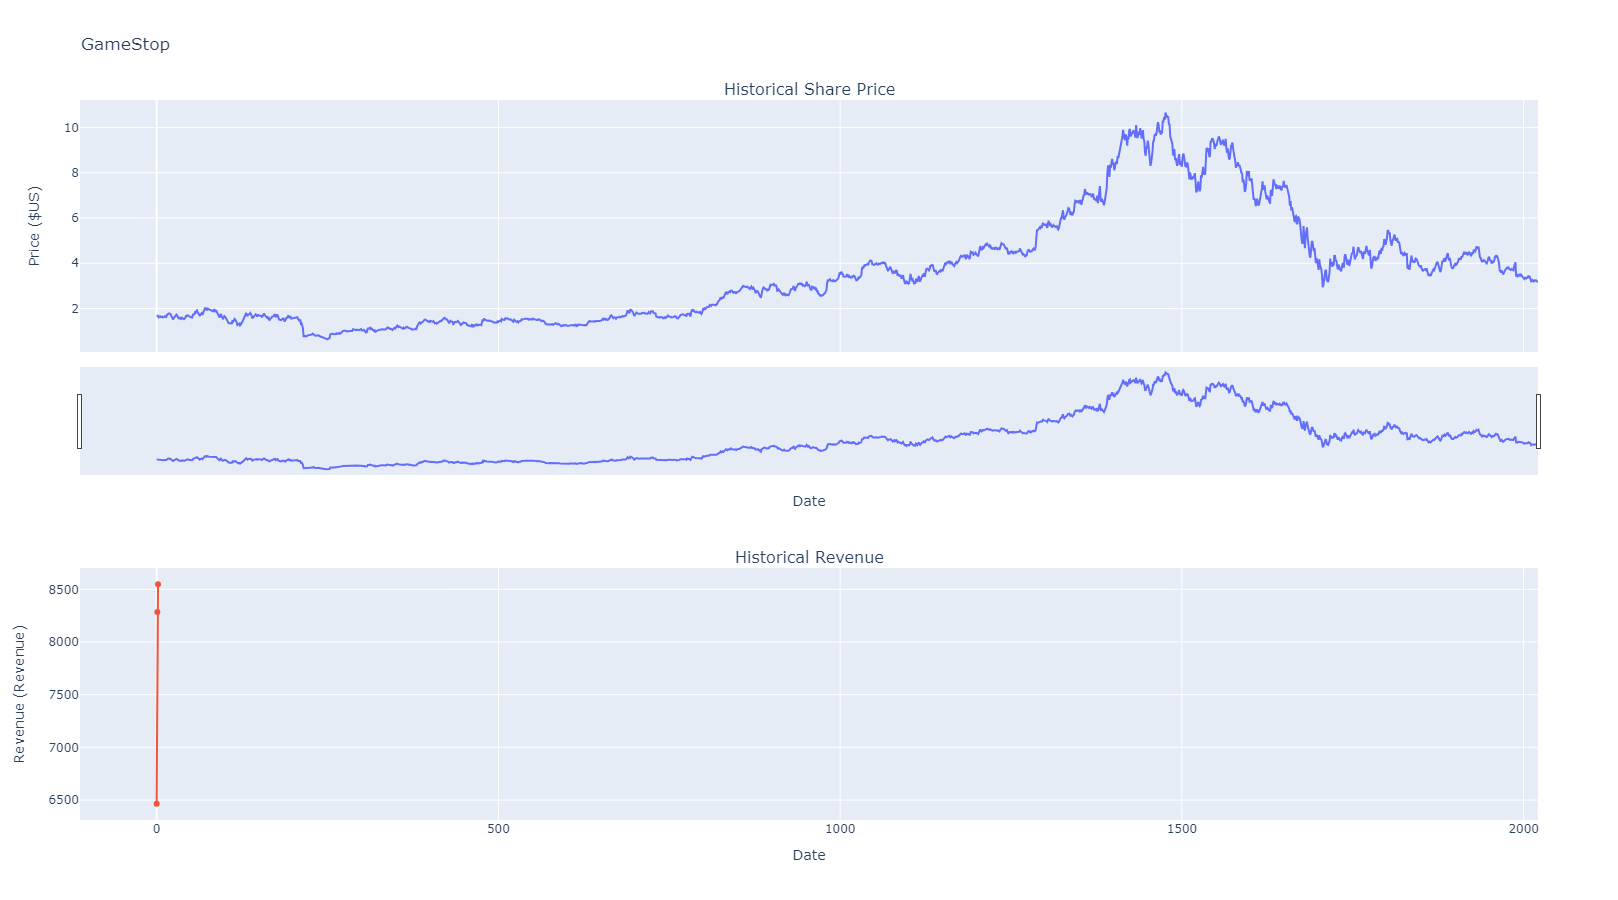

In [65]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock, revenue_column):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                        subplot_titles=("Historical Share Price", "Historical Revenue"), 
                        vertical_spacing=0.3)
    
    # Assuming the Date information is in the index
    stock_data_specific = stock_data.loc[:'2021-06-14']
    revenue_data_specific = revenue_data.loc[:'2021-04-30']
    
    fig.add_trace(go.Scatter(x=stock_data_specific.index, y=stock_data_specific['Close'].astype("float"), 
                             name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=revenue_data_specific.index, y=revenue_data_specific[revenue_column].astype("float"), 
                             name="Revenue"), row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text=f"Revenue ({revenue_column})", row=2, col=1)
    
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    
    fig.show()

# Assuming gme_data and gme_revenue are DataFrames for GameStop stock data and revenue
# Call the make_graph function
make_graph(gme_data, gme_revenue, 'GameStop', 'Revenue')


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
